## Credit Data Analysis

#### Load Data

In [99]:
import numpy as np
import pandas as pd
import scipy as sc
import sklearn as sk
import os
from matplotlib import pyplot as plt
%matplotlib inline
data = pd.read_csv("dmagecr.csv",sep=';')

In [2]:
data.describe()

,checking,duration,history,purpose,amount,employed,installp,marital,coapp,resident,...,age,other,housing,existcr,job,depends,telephon,foreign,savings,Target
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.577000,20.903000,2.54500,2.708000,3271.258000,3.384000,2.973000,2.68200,1.145000,2.845000,...,35.546000,2.675000,1.929000,1.407000,2.904000,1.155000,1.404000,1.037000,2.105000,0.300000
std,1.257638,12.058814,1.08312,2.644945,2822.736876,1.208306,1.118715,0.70808,0.477706,1.103718,...,11.375469,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856,1.580023,0.458487
min,1.000000,4.000000,0.00000,0.000000,250.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,12.000000,2.00000,1.000000,1365.500000,3.000000,2.000000,2.00000,1.000000,2.000000,...,27.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,2.000000,18.000000,2.00000,2.000000,2319.500000,3.000000,3.000000,3.00000,1.000000,3.000000,...,33.000000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,4.000000,24.000000,4.00000,3.000000,3972.250000,5.000000,4.000000,3.00000,1.000000,4.000000,...,42.000000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,4.000000,72.000000,4.00000,9.000000,18424.000000,5.000000,4.000000,4.00000,3.000000,4.000000,...,75.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,5.000000,1.000000


### Get distribution of contineous variables

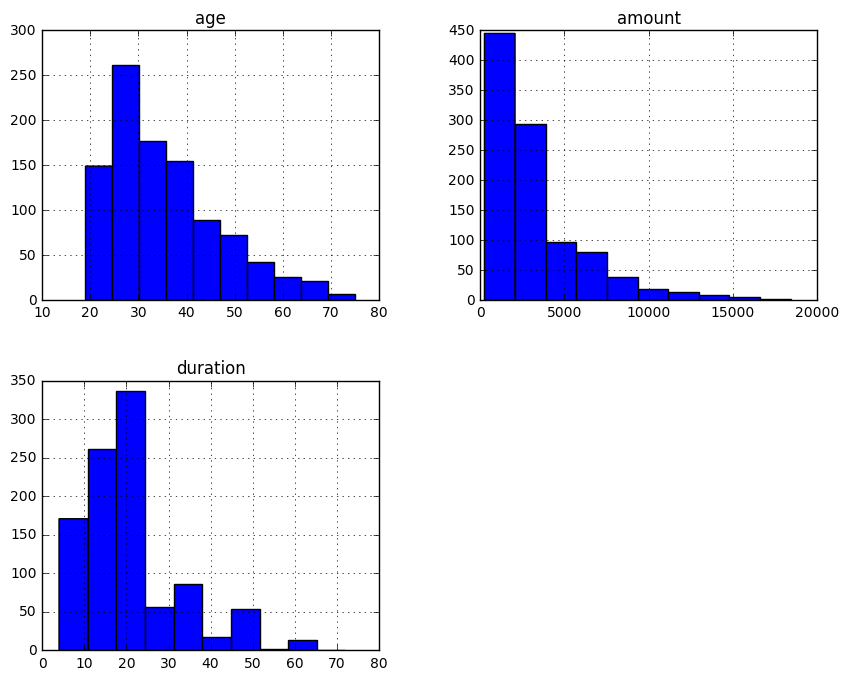

In [3]:
## Get Plots of contineous variables
catVars = ['checking','purpose','job','marital','foreign']
conVars = [col for col in data.columns if col not in catVars]
#plt.figure()
i=data[['age','amount','duration']].hist(figsize=(10,8))

### Get Stacked charts for other variables

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


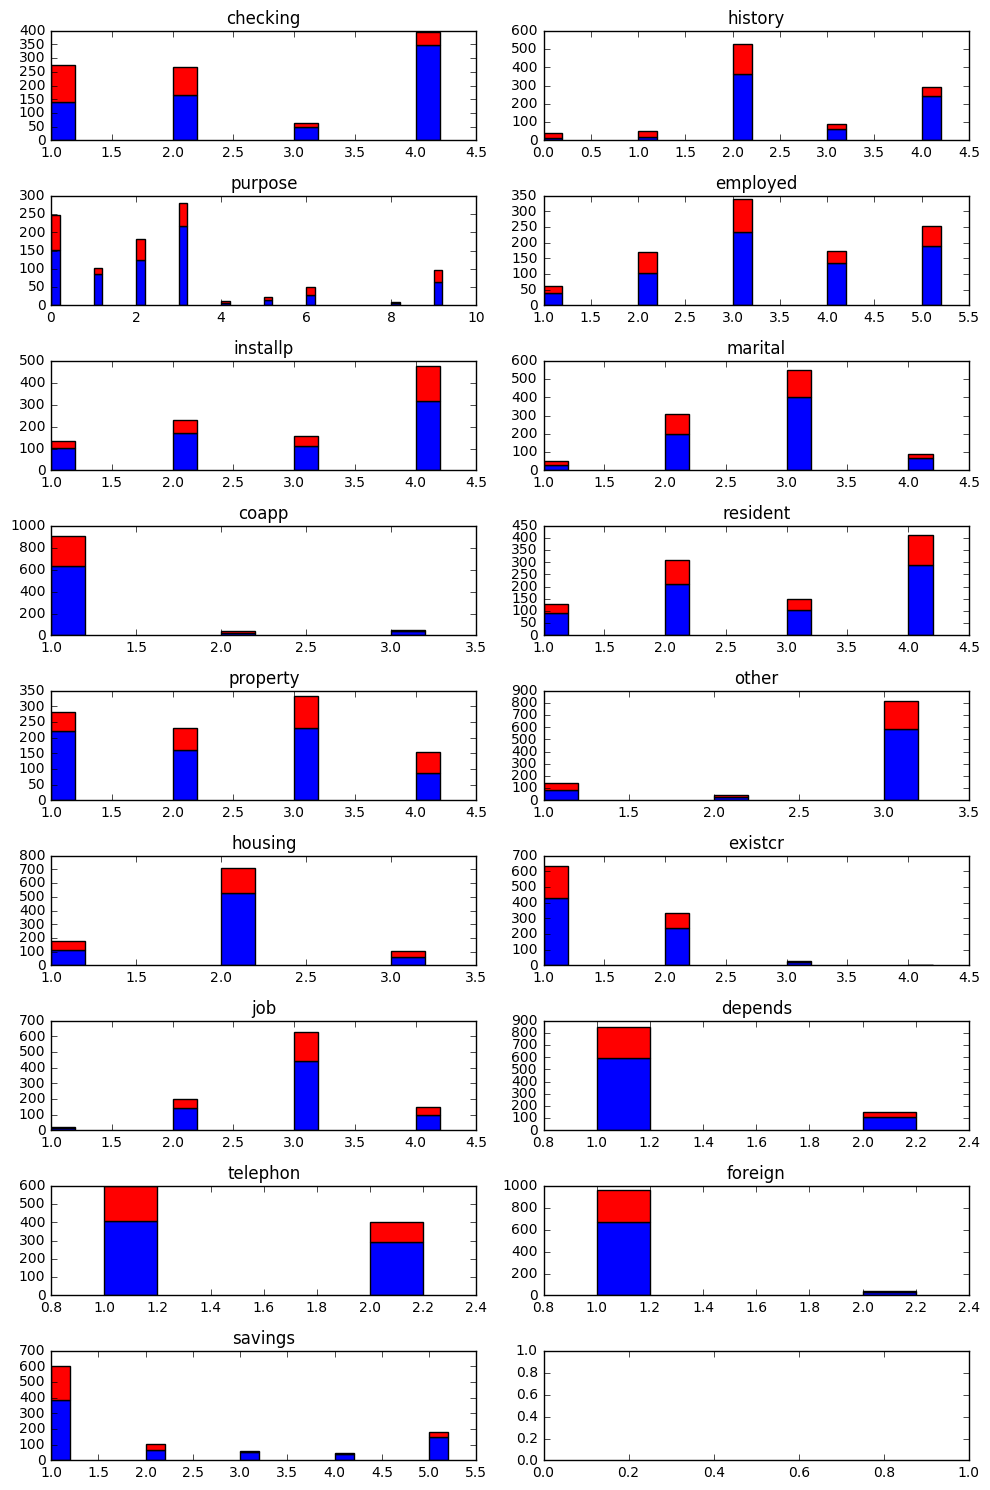

In [4]:
#bar plots with good and bad percentages
cols = [col for col in data.columns if col not in ['Target','good_bad','amount','duration','age']]
fig,ax = plt.subplots(figsize=(10,15),nrows =int(len(conVars)/2 +1) ,ncols=2)
g = data.groupby('Target')
i = 0
c = 0
for col in cols:
    #print col,i,c
    good = g.get_group(0)[col].value_counts()
    bad = g.get_group(1)[col].value_counts()
    for k in good.index:
        #print k,good[k],bad[k]
        P1 = ax[i,c].bar(k,good[k],0.2,color='b',label='Good')
        if k in bad:
            P2 = ax[i,c].bar(k,bad[k],0.2,color='r',label='bad',bottom=good[k])
    ax[i,c].set_title(col)    
    if c == 1:
        i = i+ 1
        c = 0
    else:
        c = c+1
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.legend()
plt.show()

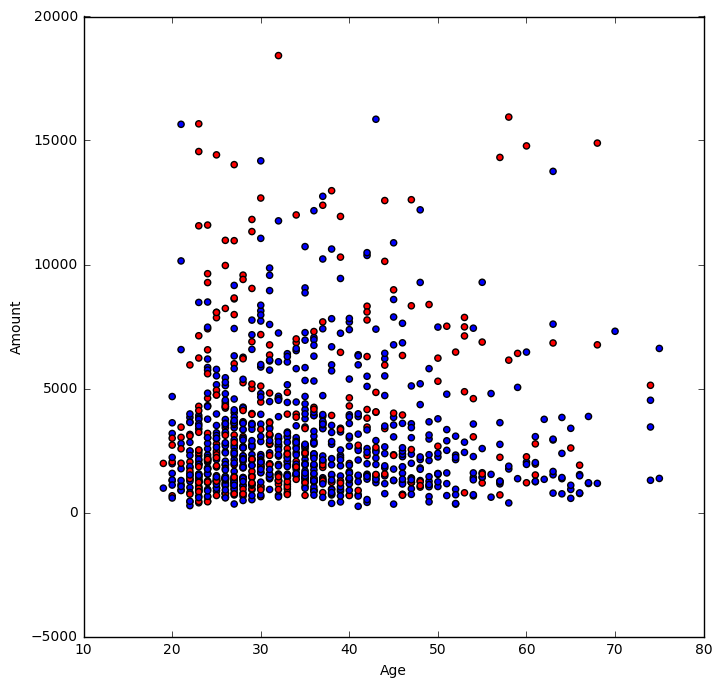

In [5]:
## Check relaitonship between age, amount and duration
colors = {0: 'b', 1: 'r'}
fig,ax = plt.subplots(figsize=(8,8),nrows=1,ncols=1)
ax.scatter(data['age'],data['amount'],c=[colors[i] for i in data['Target']])
ax.set_xlabel('Age')
ax.set_ylabel('Amount')
#ax[1].scatter(data['age'],data['duration'],c=[colors[i] for i in data['Target']])
#ax[1].set_xlabel('Age')
#ax[1].set_ylabel('Duration')
#ax[2].scatter(data['duration'],data['amount'],c=[colors[i] for i in data['Target']])
#ax[2].set_xlabel('Duration')
#ax[2].set_ylabel('Amount')

### Chi Square Independence test for categorical variables


In [6]:
from scipy import stats
pValues = {}
for col in cols:
    ct1 = pd.crosstab(data['Target'],data[col])
    colsum = ct1.sum(axis=0)
    chi,p,a,b = stats.chi2_contingency(ct1)
    pValues[col]=p
    
for k in sorted(pValues, key=pValues.get):
    print(k,"|", pValues[k])

checking | 1.21890207229e-26
history | 1.27918729568e-12
savings | 2.76121423857e-07
property | 2.85844157333e-05
purpose | 5.47211504115e-05
housing | 0.000111674653746
employed | 0.00104545234914
other | 0.00162931781865
foreign | 0.0158307549029
marital | 0.0222380054693
coapp | 0.0360559540272
installp | 0.140033312213
telephon | 0.278876154304
existcr | 0.445144080008
job | 0.596581591884
resident | 0.861552132041
depends | 1.0


## Modelling

    - Logistic regression as baseline
    - Logistic Regression with dummy variables and regularization
    - Random Forest
    - Random Forest with only important variables
  
#### Use 10 -fold Cross Validation to learn parameters.
#### Split traing:test as 70:30
    

In [10]:
### Modelling Infrastructure
from sklearn import cross_validation,grid_search
from sklearn import metrics
def performPrediction(classifier,data,tunableParams,cv,times,columns):
    AUC = np.ones(times)
    accu = np.ones(times)
    fpr=list()
    tpr=list()
    for i in range(times):
        trainingX,testX,trainingY,testY = cross_validation.train_test_split(data[columns],data['Target'],test_size=0.30)
        clf = grid_search.GridSearchCV(estimator=classifier,param_grid=tunableParams, cv=cv,scoring='f1_weighted')
        clf.fit(trainingX, trainingY)
        print(clf.best_params_)
        predictions = clf.predict(X=testX)
        preds = clf.predict_proba(testX)
        AUC[i] = metrics.roc_auc_score(testY,preds[:,1])
        accu[i]=metrics.accuracy_score(y_pred=predictions,y_true=testY)
        fpr1, tpr1, _ = metrics.roc_curve(testY, preds[:,1])
        fpr.append(fpr1)
        tpr.append(tpr1)
    return AUC, accu,fpr,tpr

### Logistic Regression

    - We need to use dummified variables
    - We could also use nondummified as the baseline

In [19]:
### Logistic regression
from sklearn import linear_model
### dummifying the variables
data_wodummy = data.copy(deep=True) 
cols = ['checking','history','purpose','marital','coapp','property','housing','job','foreign','telephon']
dummy_data = pd.get_dummies(data=data,columns=cols,drop_first=True)
del dummy_data['good_bad']
del data_wodummy['good_bad']
workData = data_wodummy

In [73]:
columns1 = [col for col in workData.columns if col not in ['Target']]
columns2 = [col for col in dummy_data.columns if col not in ['Target']]
logReg = linear_model.LogisticRegression()
tunableParams = [{'penalty': ['l1'],'C':[0.1,1.0,3.0,5.0]},
                 {'penalty': ['l2'],'C':[0.1,1.0,3.0,5.0]}
                ]

AUCReg,accuReg,fprRg,tprRg = performPrediction(classifier=logReg,data=workData,tunableParams=tunableParams,times=1,cv=10,columns=columns1)
AUCReg2,accuReg2,fprRg2,tprRg2 = performPrediction(classifier=logReg,data=dummy_data,tunableParams=tunableParams,times=1,cv=10,columns=columns2)

{'C': 5.0, 'penalty': 'l2'}
{'C': 3.0, 'penalty': 'l2'}


In [122]:
print(np.mean(accuReg),np.mean(accuReg2))

0.746666666667 0.733333333333


### Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
tunableParams = [{'n_estimators': [50,100,200,300], 'max_features':['auto','log2']}]
clrf = RandomForestClassifier(class_weight="balanced")
AUCRf,accuRf,fprRf,tprRf = performPrediction(classifier=clrf,data=workData,tunableParams=tunableParams,times=1,cv=10,columns=columns1)


{'max_features': 'log2', 'n_estimators': 100}


In [121]:
AUCRf

array([ 0.80826935])

#### Find Feature importance and drop last five columns

In [79]:
clrf = RandomForestClassifier(class_weight="balanced",max_features='auto',n_estimators=200)
trainingX,testX,trainingY,testY = cross_validation.train_test_split(workData[columns1],workData['Target'],test_size=0.30)
clrf.fit(trainingX,trainingY)
preds = clrf.predict(testX)
proba = clrf.predict_proba(testX)
metrics.roc_auc_score(y_score=proba[:,1],y_true=testY)
d = dict(zip(workData.columns.values,clrf.feature_importances_))
features = pd.DataFrame(list(d.items()),columns = ['features','imp'])
print(features.sort_values(['imp'],ascending=False))
newCols = features.sort_values(['imp'],ascending=False)[0:15]['features'].values

    features       imp
6   checking  0.134444
0     amount  0.126958
18       age  0.108590
7   duration  0.099471
16  employed  0.056165
10   savings  0.055276
2    purpose  0.054609
11   history  0.051776
13  property  0.041680
1   installp  0.041345
15  resident  0.036149
4    marital  0.033925
19       job  0.029431
12   housing  0.028040
9      other  0.024096
3    existcr  0.021754
5      coapp  0.021574
17  telephon  0.016682
8    depends  0.011730
14   foreign  0.006306


#### Rerunning random forest with only important columns

In [96]:
from sklearn.ensemble import RandomForestClassifier
tunableParams = [{'n_estimators': [50,100,200,400], 'max_features':['auto','log2']}]
clrf2 = RandomForestClassifier(class_weight="balanced")
AUCRf2,accuRf2,fprRf2,tprRf2 = performPrediction(classifier=clrf2,data=workData,tunableParams=tunableParams,times=1,cv=10,columns=cols)
print(np.mean(AUCRf2))

{'max_features': 'log2', 'n_estimators': 400}
0.834297839506


In [120]:
accuRf2

array([ 0.8])

### ROC Curve of all models 

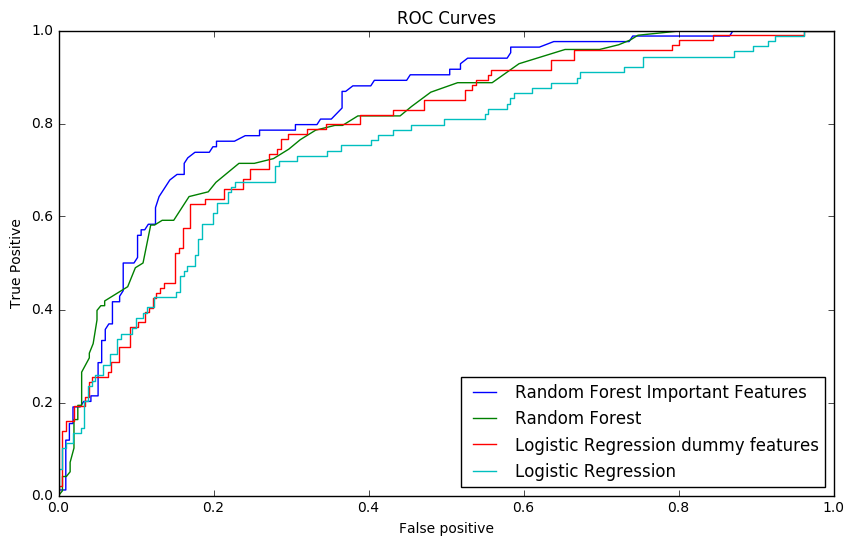

In [117]:
fig,ax = plt.subplots(figsize=(10,6),nrows=1,ncols=1)
plt.plot(np.array(fprRf2).T,np.array(tprRf2).T,label='Random Forest Important Features')
plt.plot(np.array(fprRf).T,np.array(tprRf).T,label='Random Forest')
plt.plot(np.array(fprRg2).T,np.array(tprRg2).T,label='Logistic Regression dummy features')
plt.plot(np.array(fprRg).T,np.array(tprRg).T,label='Logistic Regression')
plt.xlabel('False positive')
plt.ylabel('True Positive')
plt.title('ROC Curves')
plt.legend(loc='lower right')